# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [5]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# split the data into train and test
from sklearn.model_selection import train_test_split
# to build linear regression_model
import statsmodels.api as sm
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score#ignore warnings
 


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [6]:
# loading the dataset
mydata = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [7]:
# Displaying the first five rows
mydata.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [8]:
# Displaying the dataframe dictionnary : null value, datatypes, etc
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

#### Observations:
- The dataset shows 15 columns with three datatypes:
  - Float
  - Integer
  - Object
   

In [9]:
# Displaying the number of rows and columns
mydata.shape

(3454, 15)

<IPython.core.display.Javascript object>

#### Observations:
- The dataset contains 3454 rows and 15 columns as stated earlier.

In [10]:
# Displaying the number of columns
mydata.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

<IPython.core.display.Javascript object>

In [11]:
# Describing the dataframe with central tendancy summary
mydata.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

#### Observations:


- 34 brand names exist.
- The average (mean) price for a used phone is 4.36 euros compared to 5.23 euros for a new one
- Android tops the list of operating systems  used for the phones along with 4G.
- The maximum price for a used phone is 6.6 euros for a minimum of 1.5 euros
- Half of the users spends 4.4 euros for a used phone. A quarter of the users spends around 4 euros for 4.7 euros for three 
  quarters of the users
- The average refurbished phone's age is 22 months- a little less than 2 years- for a maximum of 36 months ~ 3 years

In [12]:
# Checking the number of null values
mydata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- Missing values can be noticed for 6 columns
- We will fix it before proceeding

In [13]:
# Creating a copy of the original data to avoid changes to it
df = mydata.copy()

<IPython.core.display.Javascript object>

In [14]:
# Converting the object types to  categorical datatypes
df[["brand_name", "os", "4g", "5g"]] = df[["brand_name", "os", "4g", "5g"]].astype(
    "category"
)

<IPython.core.display.Javascript object>

In [15]:
# Checking the copy to verify the number of entries, column and dtypes and the conversion of object
# datatypes to category ones.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

<IPython.core.display.Javascript object>

In [16]:
# Checking for duplicated values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [42]:
brand = df.groupby("brand_name")[
    "selfie_camera_mp", "main_camera_mp", "int_memory", "ram", "battery", "weight"
].median()
brand

C:\Users\Ahmet\AppData\Local\Temp/ipykernel_10488/938477880.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand = df.groupby("brand_name")[


,selfie_camera_mp,main_camera_mp,int_memory,ram,battery,weight
brand_name,,,,,,
Acer,2.0,5.00,16.0,4.00,2700.0,155.00
Alcatel,1.3,5.00,16.0,4.00,2500.0,149.00
Apple,7.0,12.00,32.0,4.00,3937.0,299.00
Asus,5.0,13.00,32.0,4.00,3300.0,170.00
BlackBerry,2.0,8.00,32.0,4.00,2840.0,167.50
Celkon,0.3,3.15,256.0,0.25,1400.0,140.00
Coolpad,8.0,13.00,32.0,4.00,2650.0,155.00
Gionee,5.0,8.00,32.0,4.00,3000.0,151.50
Google,8.0,12.20,64.0,4.00,3430.0,167.00


<IPython.core.display.Javascript object>

In [61]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
for col in cols_impute:
    df[col] = df.groupby(["brand_name"])[col].transform(lambda x: x.fillna(x.median()))

# df.groupby(['release_year', 'brand_name'])

<IPython.core.display.Javascript object>

In [62]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

In [63]:
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

<IPython.core.display.Javascript object>

In [64]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# # Filling missing values using the column median for the predictor variables
# medianFiller = lambda x: x.fillna(x.median())
# numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [48]:
# Checking presence of missing values in columns after filling them with their respective medians
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate analysis
- Plotting the numerical variables

####  Numeric variables

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histo_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

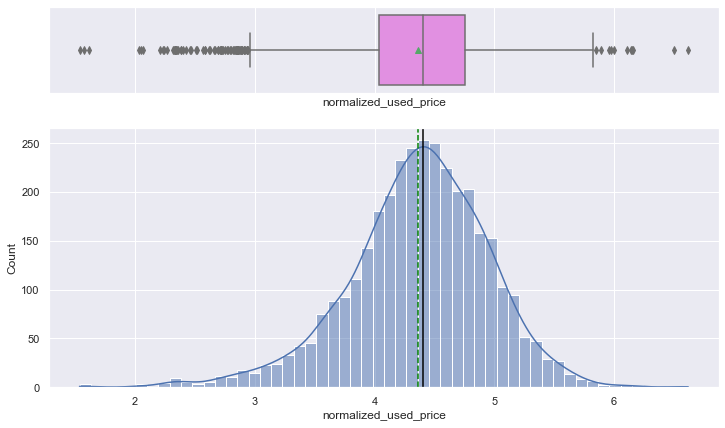

<IPython.core.display.Javascript object>

In [16]:
histo_box(df, "normalized_used_price", kde=True)

Observation:
- The median is slightly higher than the mean. This depicts a left skewed distribution. 
  However, a visual inspection of the distribution shows a bell shaped curve close to normal.
  Half of the used phones cost 4.4 euros for an average cost of 4.36 euros.
- Some used phones prices lie below the min price of 1.5 euros and others above the max price 6.6 euros. This showcases   
  the presence of outliers.

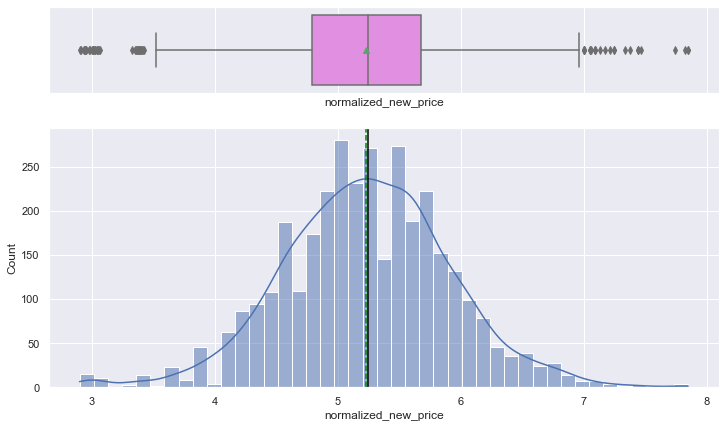

<IPython.core.display.Javascript object>

In [17]:
histo_box(df, "normalized_new_price", kde=True)

Observations:
- The mean and the median overlap. This shows a symetrical distribution. Hence, a normal distribution.

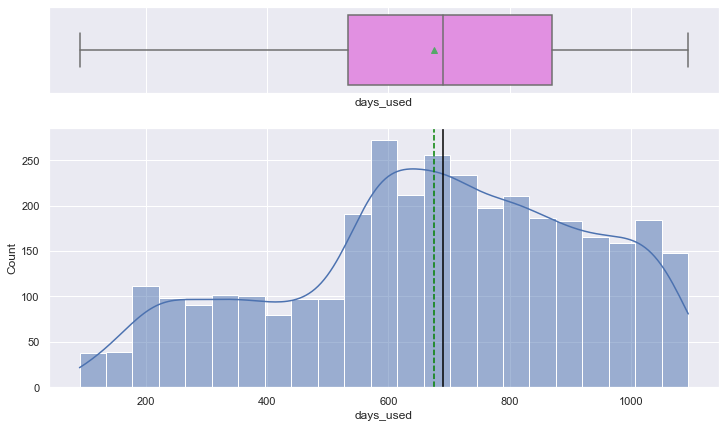

<IPython.core.display.Javascript object>

In [18]:
histo_box(df, "days_used", kde=True)

#### Observations:
- The average number of days a phone was used is 674 days for a median of 690 days. This indicates a slightly left skewed distribution.

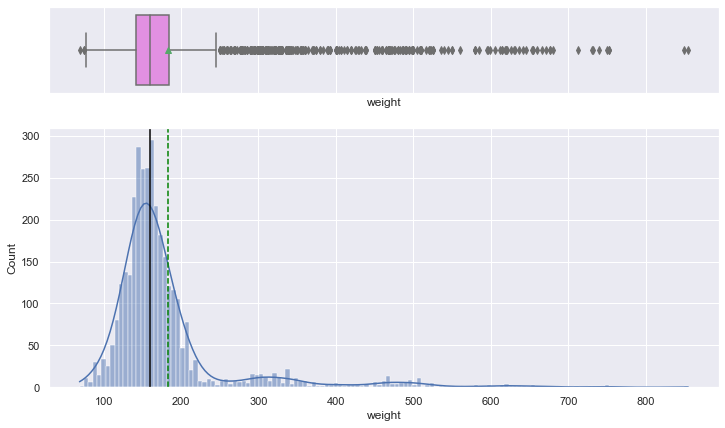

<IPython.core.display.Javascript object>

In [19]:
histo_box(df, "weight", kde=True)

#### Observations:
- The average phone weight is 182 grams. Most phones weigh between 100 and 200 grams. The median weight is 160 grams.
- The Median being less than the mean and being close to the 75% quartile results in a heavyly right skewness of the distribution.
- Many phones weigh more than the maximum weight 855grams. This denotes the presence of outliers.

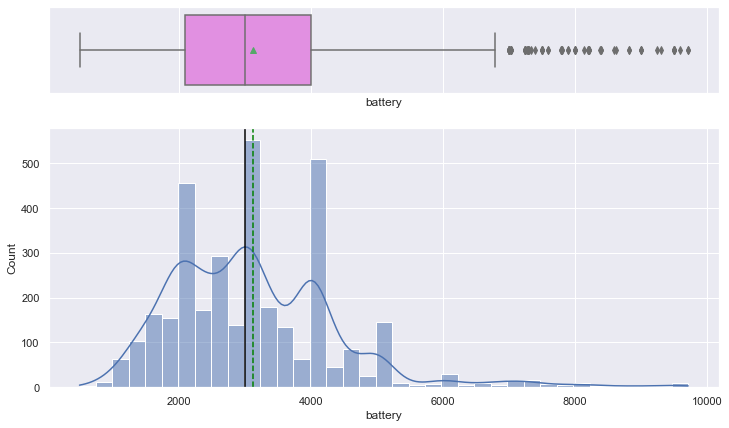

<IPython.core.display.Javascript object>

In [20]:
histo_box(df, "battery", kde=True)

#### Observations:
- The battery distribution shows a right skewness. The average energy capacity of the device battery is 3133 mah 
  for a median of 3000 mah.

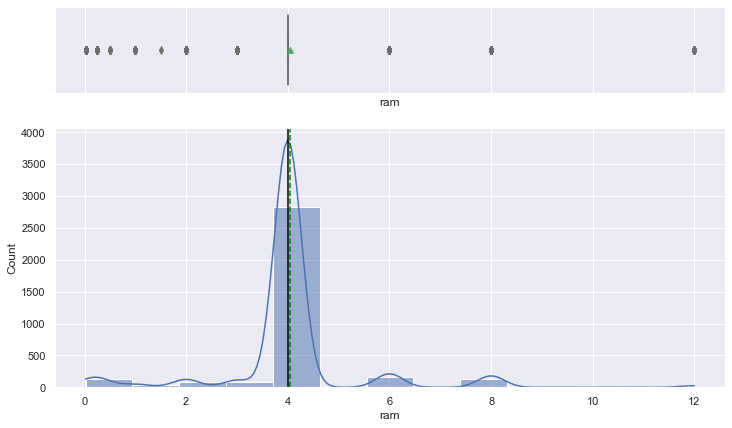

<IPython.core.display.Javascript object>

In [21]:
histo_box(df, "ram", kde=True)

#### Observations:
- The average RAM is 4GB and the median is 4GB. Mean equals to median. As a result , we have a symetrical normal distribution.

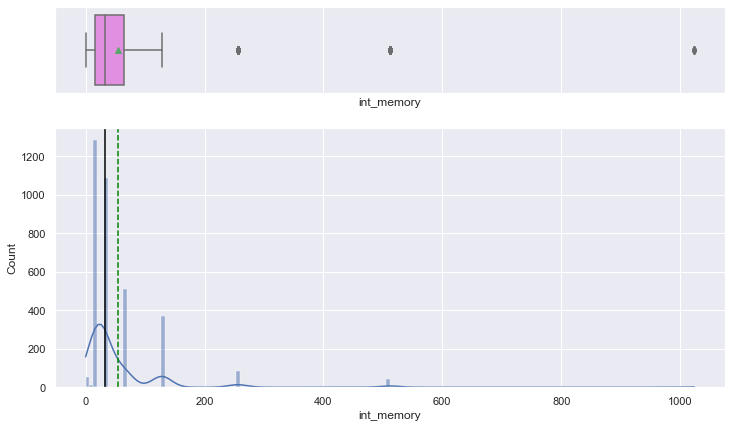

<IPython.core.display.Javascript object>

In [22]:
histo_box(df, "int_memory", kde=True)

#### Observations:
- The average amount of internal memory is 54 GB for a median (50%) of 32GB. 
- The mean being greater than the median, the distribution showcases a positive right skewness.

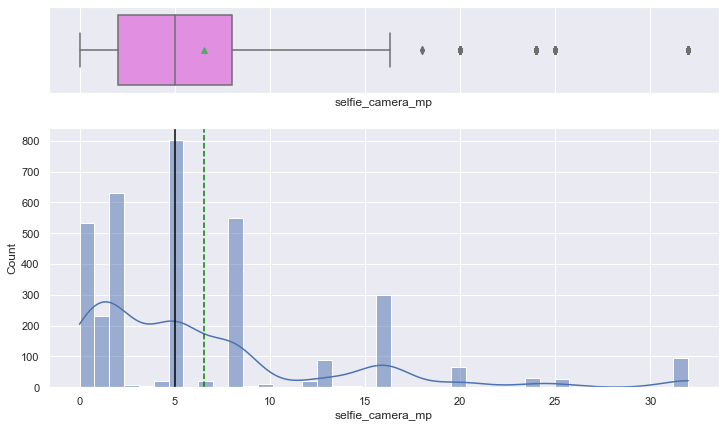

<IPython.core.display.Javascript object>

In [23]:
histo_box(df, "selfie_camera_mp", kde=True)

#### Observations:
- The average resolution of the front camera in megapixels is 6.5 megapixels for a median of 5 megapixels. This denotes a right 
  skewed distribution.
- Few resolutions (outliers) lie above 32 megapixels, the maximum resolution.

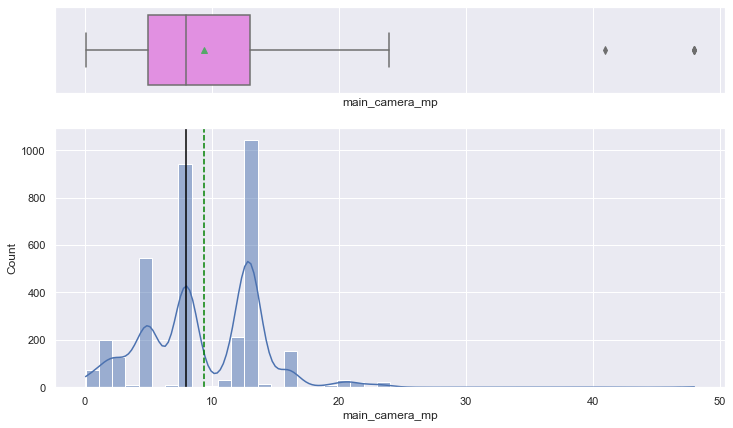

<IPython.core.display.Javascript object>

In [24]:
histo_box(df, "main_camera_mp", kde=True)

#### Observations:

- The average resolution of the rear camera in megapixels is 9.4 megapixels for a median of 8 megapixels. This denotes a right skewed distribution.
- A very few devices have resolutions (outliers) above 48 megapixels the maximum resolution.


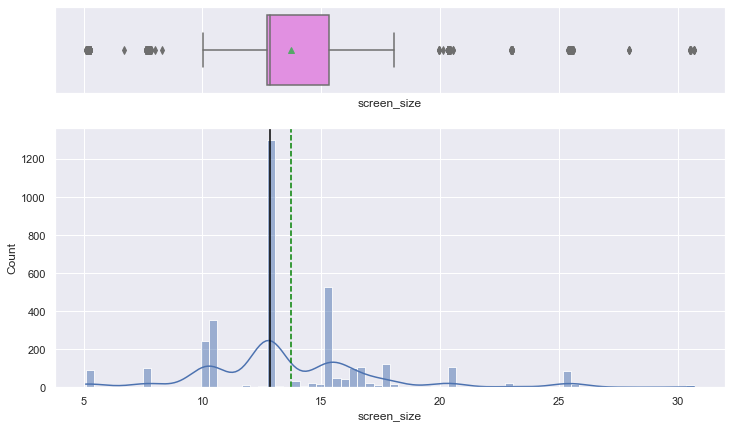

<IPython.core.display.Javascript object>

In [25]:
histo_box(df, "screen_size", kde=True)

#### Observations:
- The average screen size is 13.7 cm for all brands. Half of the devices have a screen size of 12.83 cm. A mean greater than a median highlights a positive right skewness.
- Outliers are also present. 

#### Categorical variables 

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=70, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:

        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

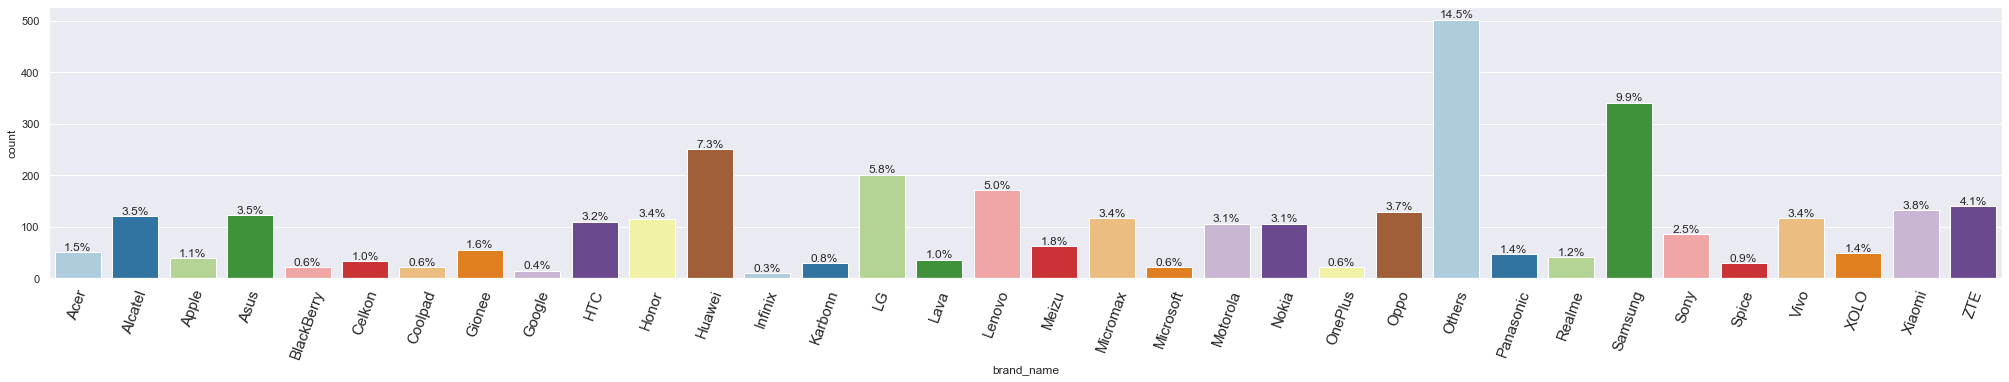

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "brand_name", perc=True)

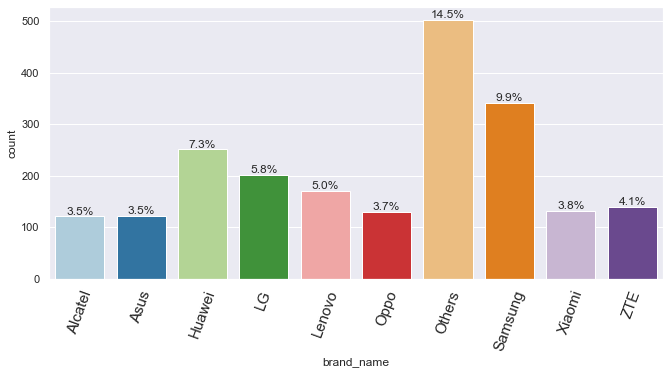

<IPython.core.display.Javascript object>

In [28]:
# Displaying the barplots for the first 10 brands for a better view
labeled_barplot(df, "brand_name", perc=True, n=10)

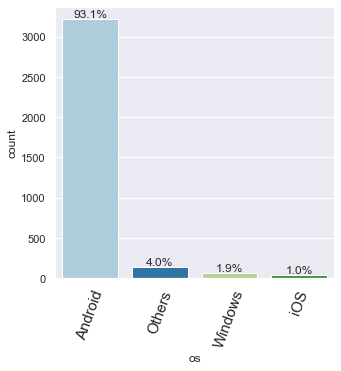

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "os", perc=True)

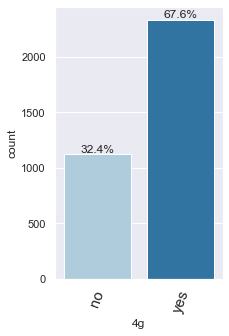

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "4g", perc=True)

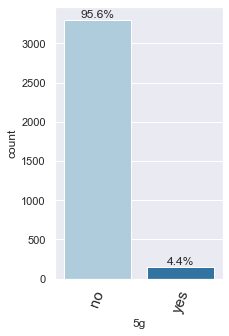

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "5g", perc=True)

#### Observations:
- Others, Samsung, Huawei, LG, Lenovo, ZTE, Xiami, Oppo, Asus top the list of the most used phones.
- Android is the most widely used operating system. It makes up 93.1 % of the total of used phones.
- Among the 5g device holders, the percentage is higher for those who do not have it. A small percentage has 5g phone networks. A high price can be an explanation as well as a new release. 
- 4g holders have a lower percentage of holders compared to 5g, and a greater percentage for those who do not have it may have older network models.


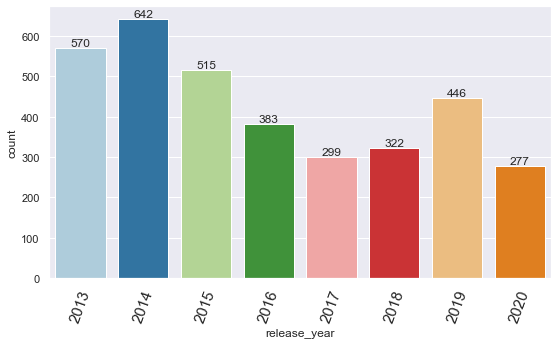

<IPython.core.display.Javascript object>

In [32]:
# Release year is not a categorical variable but we will use the barplot to visualize it
labeled_barplot(df, "release_year")

#### observations:
- The bulk of the phones's release year in the distribution lies between 2014 (642) and 2013 (570). 
- The number of phones decreases from 2013 to 2018, but an uptick can be noticed in 2019 which can imply the 5g release. 
- The average release year is late 2015 for a median release year of mid 2015 resulting in a positive right skewed distribution.

### Observations:
- A visual inspection of the normalized used device prices distribution shows a bell shaped curve close   to normal, though the data infers a sliglty left skewness as the median is slightly higher than the 
  mean.
- Android is the most widely used operating system. It makes up 93.1 % of the total of the used 
  phones.

### Bivariate Analysis

#### How does the amount of RAM vary with the brand?

In [33]:
df.sample(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3274,Sony,Android,15.24,yes,no,8.0,8.0,128.0,4.0,3600.0,151.0,2020,349,4.937132,5.602672
754,Asus,Android,15.24,yes,no,13.0,5.0,16.0,4.0,3000.0,190.0,2015,1014,4.309590,5.734118
2453,Samsung,Android,12.83,yes,no,12.0,5.0,32.0,4.0,3600.0,157.0,2016,584,4.530770,5.991740
2291,Others,Android,12.70,yes,no,13.0,5.0,16.0,4.0,2500.0,154.0,2015,813,4.259294,5.306732
1776,LG,Android,12.83,yes,no,13.0,2.1,16.0,4.0,3140.0,172.0,2013,733,4.808111,5.990789


<IPython.core.display.Javascript object>

In [34]:
# Checking the RAM mean by brand name
df_brand_ram = df.groupby("brand_name")["ram"].mean()
mean_brand = df_brand_ram.sort_values(ascending=False).reset_index()
mean_brand

,brand_name,ram
0,OnePlus,6.363636
1,Oppo,4.961240
2,Vivo,4.756410
3,Huawei,4.655378
4,Honor,4.603448
5,Xiaomi,4.583333
6,Google,4.533333
7,Meizu,4.451613
8,Samsung,4.199413
9,Realme,4.195122


<IPython.core.display.Javascript object>

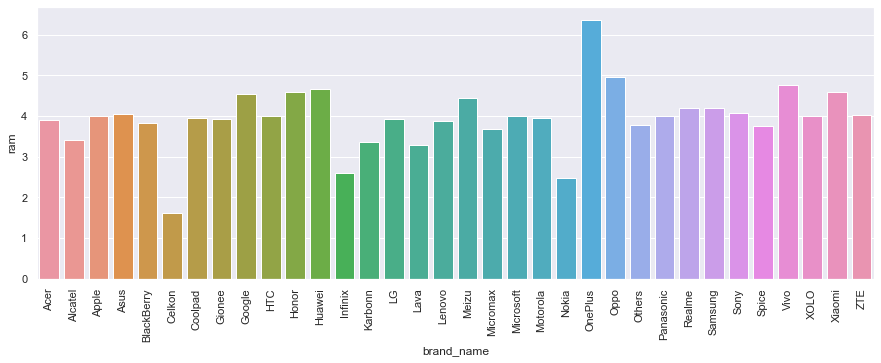

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_brand, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

#### Observations:
- OnePlus, Oppo and Vivo, Huawei come up as the smoothest devices as they have the highest RAM average. 
- The least smoothest devices are Celkon, Nokia and Infinix.

#### How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [36]:
# Computing energy greater than 4500 for battery
df_battery_4500 = df[df["battery"] > 4500]

<IPython.core.display.Javascript object>

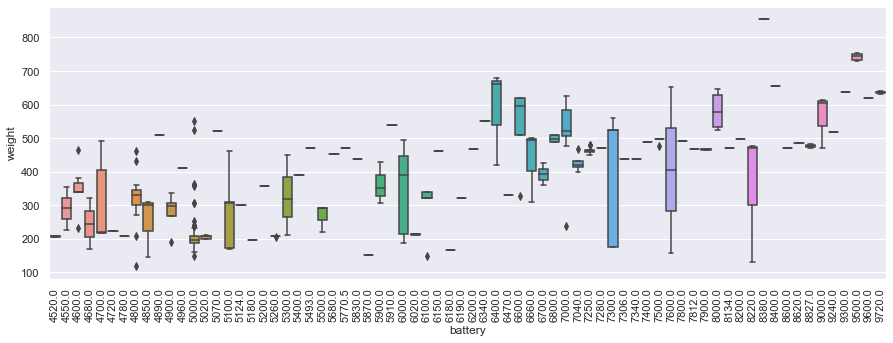

<IPython.core.display.Javascript object>

In [37]:
(plt.figure(figsize=(15, 5)))
sns.boxplot(data=df_battery_4500, y="weight", x="battery")
plt.xticks(rotation=90)
plt.show()

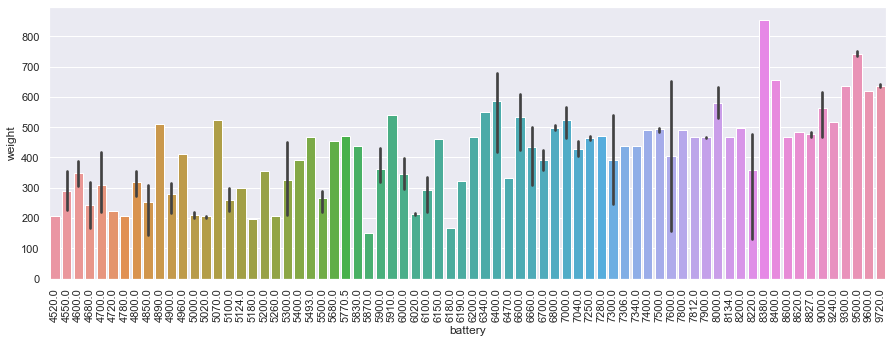

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_battery_4500, y="weight", x="battery")
plt.xticks(rotation=90)
plt.show()

#### Observations:
- These plots show that as energy increases, weight seems to increase as well, though this is not consistent

#### How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [39]:
# Converting screen size from inches to cm . 1 inch equals to 2.54 cm
df_bigscreen = df[df["screen_size"] > 6 * 2.54].value_counts()
screen_size_bybrand = (
    df_bigscreen.groupby("brand_name")
    .count()
    .sort_values(ascending=False)
    .reset_index()
)
screen_size_bybrand

,brand_name,0
0,Huawei,149
1,Samsung,119
2,Others,99
3,Vivo,80
4,Honor,72
5,Oppo,70
6,Xiaomi,69
7,Lenovo,69
8,LG,59
9,Motorola,42


<IPython.core.display.Javascript object>

#### Observations:
- Huawei offers the highest number of tablets and devices (149) with a screen size greater than 6 inches.
- Microsoft just offers one device with a screen size greater than 6 inches.

#### What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [40]:
df_bigger_selfie = df[df["selfie_camera_mp"] > 8]


<IPython.core.display.Javascript object>

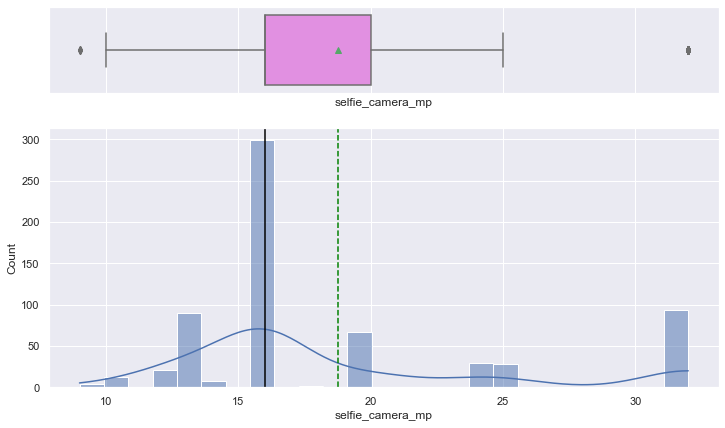

<IPython.core.display.Javascript object>

In [41]:
histo_box(df_bigger_selfie, "selfie_camera_mp", kde=True)

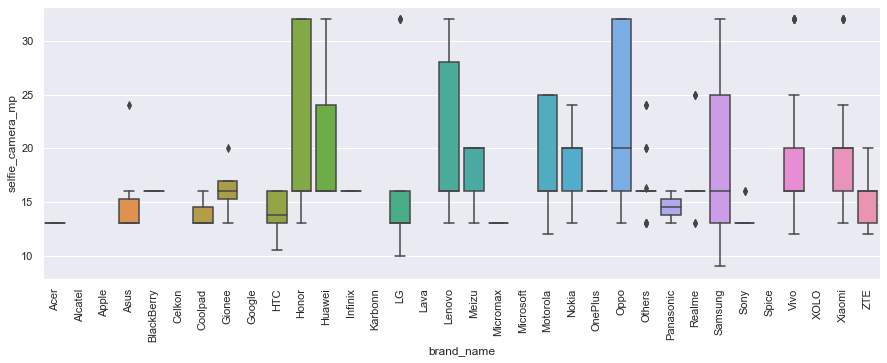

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_bigger_selfie, y="selfie_camera_mp", x="brand_name")
plt.xticks(rotation=90)
plt.show()

#### Observations:
- The median resolution of front cameras accross all brands is around 16 megapixels for an average resolution of 19 megapixels. 
- Honor, lenovo, Samsung and Oppo offer devices with the highest resolution for the selfie cameras
- Some outliers are visible but do not seem to be out of proportion.

#### Normalized used price vs 4G and 5G

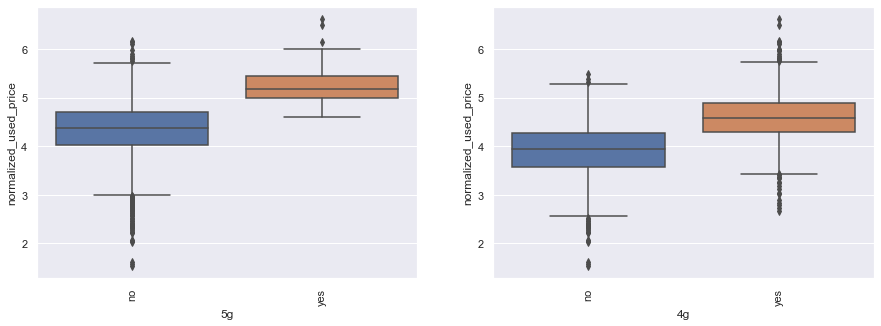

<IPython.core.display.Javascript object>

In [43]:
# Visualizing the effect of normalized used price with the the different brodband technologies 4G and 5G
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="normalized_used_price", x="5g")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="normalized_used_price", x="4g")
plt.xticks(rotation=90)

plt.show()

#### Observations:

- The maximum used price for those who carry 5g devices lies above 6 euros. The minimum  price is under 5 euros ~ 4.6 euros. The presence of outliers confirms that prices can go beyond 6 euros. No 5g phone holders spend less than the minimum. In constrat, those who do not have 5g phones spend a maximum of ~5.75 euros close to 6 euros, the maximum price for a 5g device and a minimum of around 3 euros. 
- 4g phone users can spend as much as ~4.90 euros for a minimum of 3.5 euros.Prices can go as low as 2.5 euros(outliers). In constrast , those who do not have 4g devices can spend as much as 5.25 euros for a minimum of 2.5 euros.
- The newer the network (5g), the higher the normalized used price and the higher the number of people who do not carry 5g devices.

#### Normalized Used Price vs Release Year

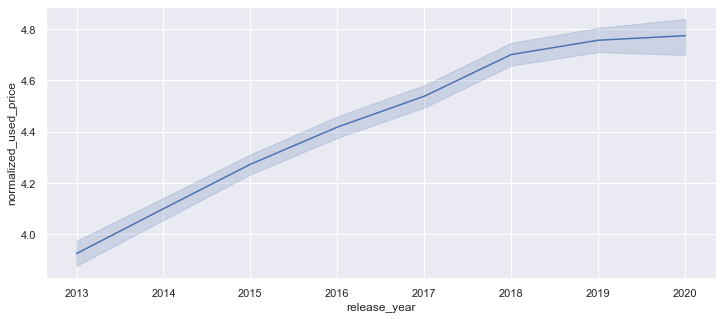

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price")
plt.show()

#### Observations:
- Normalized used price follows an ascending curve. From less than 4 euros in 2013, a device costs around 5 euros in 2020.
- The closer the release year from the current date, the higher the normalized used price.
- Will this trend be maintained? Our machine learning model building can give the answer. 

#### Checking for Correlation between numeric variables

In [45]:
# Selecting the numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# Removing year as it is a temporal variable
numeric_columns.remove("release_year")
# Running the dataframe with numeric columns and displaying a sample of five rows
df[numeric_columns].sample(5)

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price
2343,12.70,13.0,5.0,32.0,4.0,2000.0,154.5,834,4.326514,5.300914
2726,10.36,8.0,0.3,32.0,4.0,2300.0,149.0,1046,3.732896,5.299067
3389,16.94,8.0,16.0,256.0,8.0,4085.0,206.0,367,5.415345,6.312841
2194,10.29,5.0,2.0,16.0,4.0,1900.0,130.0,992,3.536602,5.082336
2646,10.16,5.0,0.3,16.0,4.0,1700.0,148.5,950,4.305685,5.243439


<IPython.core.display.Javascript object>

In [46]:
# Correlation of all attributes with normalized used price
df[df.columns[:]].corr()["normalized_used_price"][:]

screen_size              0.614785
main_camera_mp           0.552477
selfie_camera_mp         0.607548
int_memory               0.190954
ram                      0.518783
battery                  0.612041
weight                   0.382456
release_year             0.509790
days_used               -0.358264
normalized_used_price    1.000000
normalized_new_price     0.834496
Name: normalized_used_price, dtype: float64

<IPython.core.display.Javascript object>

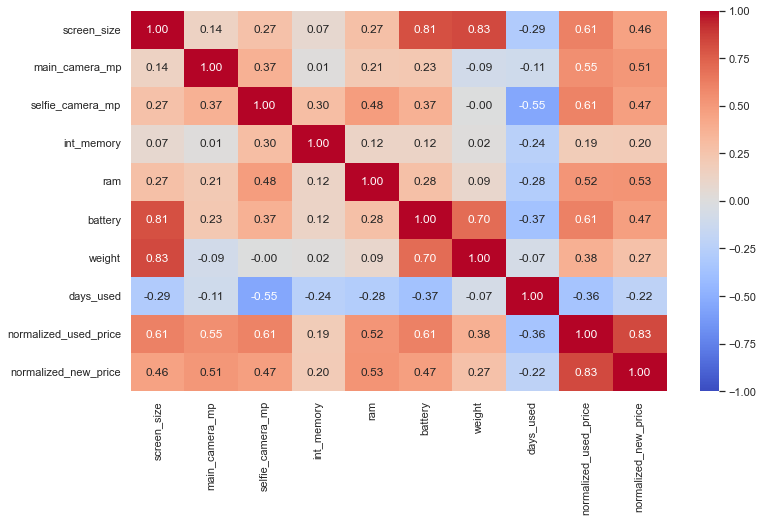

<IPython.core.display.Javascript object>

In [47]:
# Plotting the heatmap to check the correlation between the predictors and the target variable(normalized used price)
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

#### Observations:
- The normalized used price is highly correlated with the normalized new price: 83%
- The normalized used price is moderately correlated with screen size(61%), selfie camera (61%) and battery(61%).
- Ram  (52%) and main camera (55%) are slightly correlated to the normalized used price.
- Screen size and weight are highly correlated (83%). Likewise for Screen size and battery (81%).
- Selfie camera resolution and days used are slightly negatively correlated.

### EDA Conclusion
- The EDA points to a close to normal distribution for the normalized used price target variable.
- The RAM variable follows a normal distribution.
- The weight variable is heavily right skewed. Fixing the strong right skewness is an entry criteria for running a good model.
- The plotting of the following variables int memory, self camera, main camera, battery shows a right skewness. 
- Outliers remain visible for the following variable distributions:
   - Normalized used price
   - Normalized new price
   - Weight
   - Battery
   - Ram
   - Int memory
   - Selfie camera
   - Main camera
- Outlliers need to be detected and treated. Different methods exist to treat them. The Inter Quantile range method is our choice.


### Variable Transformation

#### Copying Dataframe

In [48]:
# Creating a copy of the dataframe
df1 = df.copy()

<IPython.core.display.Javascript object>

#### Engineering Release Year Column

In [49]:
# Taking 2021 as the baseline for data collection. Creating a new column that computes the used devices
# age
df1["phone_age"] = 2021 - df1["release_year"]
# Dropping the release year column
df1.drop("release_year", axis=1, inplace=True)
df1["phone_age"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: phone_age, dtype: float64

<IPython.core.display.Javascript object>

In [50]:
# Converting days used to year
df1["days_used"] = df1["days_used"] / 365
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,phone_age
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,0.347945,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,0.890411,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,0.443836,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,0.945205,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,0.802740,4.389995,4.947837,1


<IPython.core.display.Javascript object>

#### Re-plotting Variables before Transformation

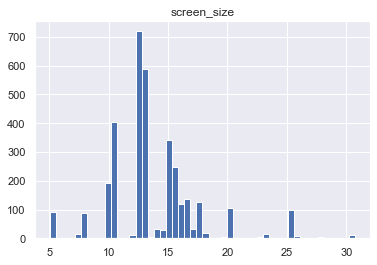

screen_size
(Value < = 0): 0


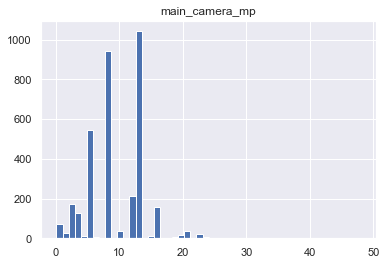

main_camera_mp
(Value < = 0): 0


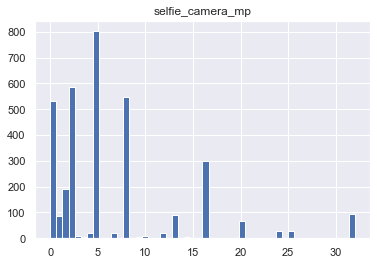

selfie_camera_mp
(Value < = 0): 39


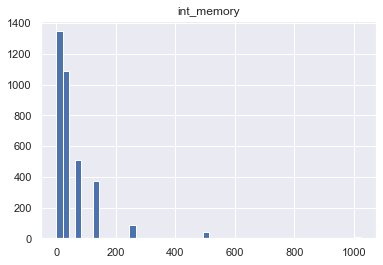

int_memory
(Value < = 0): 0


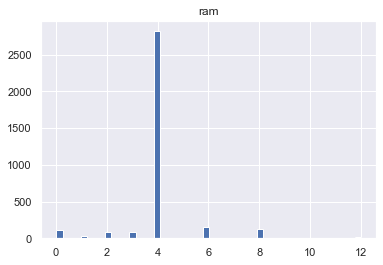

ram
(Value < = 0): 0


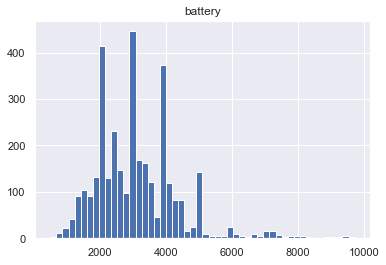

battery
(Value < = 0): 0


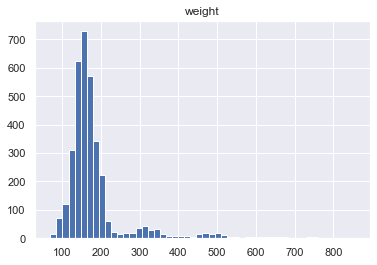

weight
(Value < = 0): 0


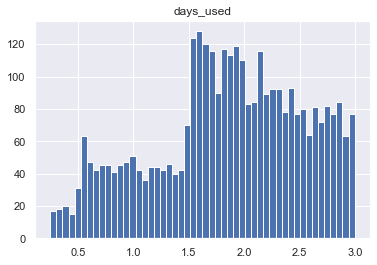

days_used
(Value < = 0): 0


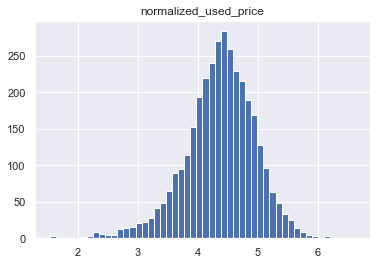

normalized_used_price
(Value < = 0): 0


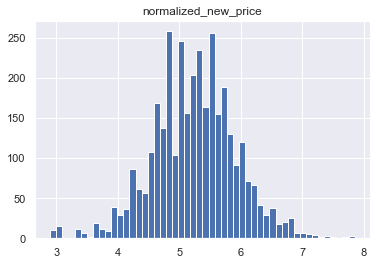

normalized_new_price
(Value < = 0): 0


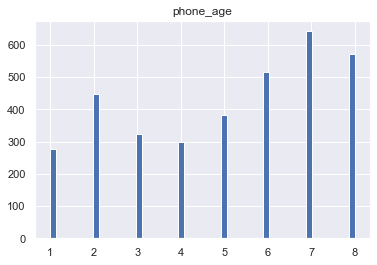

phone_age
(Value < = 0): 0


<IPython.core.display.Javascript object>

In [51]:
# Plotting histograms of the variables again and checking for negative or zero values to see whether log transformation can be applied
# Log transformation cannot be applied to 0 or negative values.
cols_to_log = df1.select_dtypes(include=np.number).columns
for colname in cols_to_log:
    plt.hist(df1[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(colname)
    # printing the number of negative or zero values
    print("(Value < = 0):", (np.sum(df1[colname] <= 0)))

#### Observations:
- Selfie camera mp has 39 zeroes. Log to fix skewnewss cannot be applied but it is ok to go with it per forum discussion's direction.
- Weight is heavily right skewed. The next step will fix it.
- Independent variables do not need to be normally distributed but we try to improve weight that is heavily right skewed. Howver, residuals need to be normal distributed.

#### Variable  Weight Log Transformation

In [52]:
# Weight log is heavily right skewed as we have seen it. So we will reduce skewness applying the log transformation
df1["weight_log"] = np.log(df1["weight"])

<IPython.core.display.Javascript object>

#### Plotting Weight log after skewness reduction

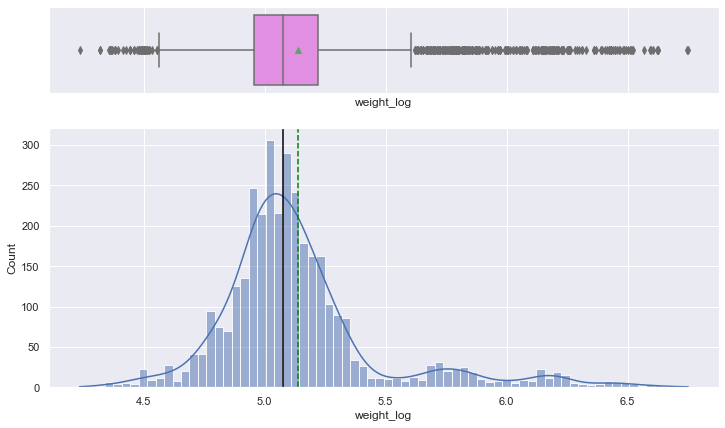

<IPython.core.display.Javascript object>

In [53]:
histo_box(df1, "weight_log", kde=True)

#### Observations:
- Weight is still right skewed but has improved.

#### Replacing 0 values with Median for Selfie Camera 

In [54]:
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].replace(
    0, df1["selfie_camera_mp"].median()
)

<IPython.core.display.Javascript object>

#### Checking and Visualizing outliers

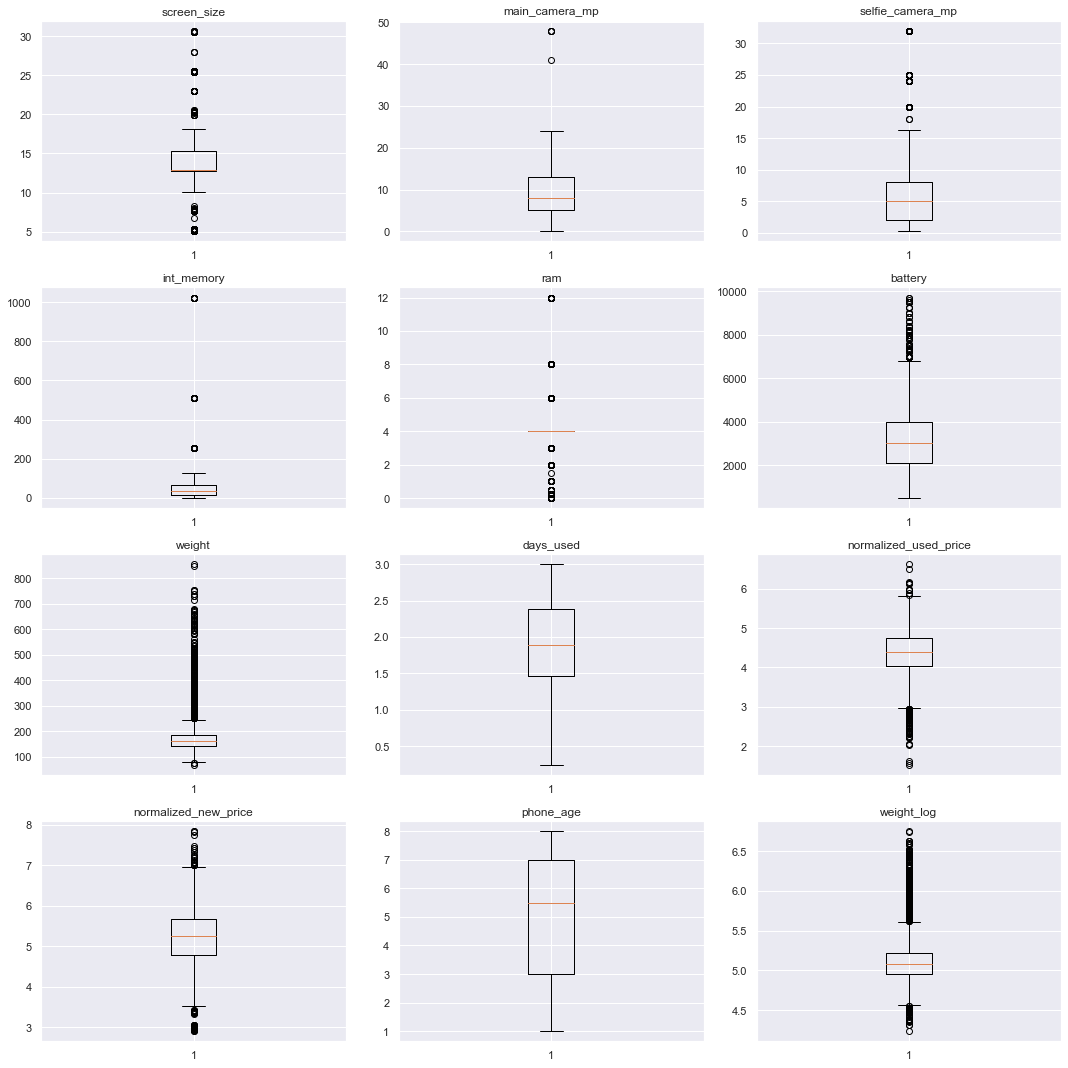

<IPython.core.display.Javascript object>

In [55]:
# In the EDA, we have visually spotted outliers. Here we will do it again to ease
# comparison when applying treatment. We could have removed  the day_used column but we will run all numeric
# columns

outlier_cols = df1.select_dtypes(include=np.number).columns

# Plotting the boxplots
plt.figure(figsize=(15, 15))

# looping through the outliers list and displaying the boxplots showing the outliers
for i, variable in enumerate(outlier_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##### Observations:
- All the variables but phone age and days used show some outliers.
- Ram will not be treated as doing so will remove the variation in the column and most likely make it a constant.
- These outliers will be treated using the inter quantile range (IQR) method or flooring and capping, i.e., we will   replace the
    - lower outliers by Q1 - 1.5IQR.
    - upper outliers by Q3 + 1.5IQR.

#### Treating Outliers

In [56]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # All the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker- Flooring
    # All the values greater than Upper_Whisker will be assigned the value of Upper_Whisker- Capping

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [57]:
# Defining the outliers columns list to be treated
treat_out_cols = [
    item
    for item in df1.select_dtypes(include=np.number).columns
    if item not in ["days_used", "phone_age", "ram"]
]

# Appliying the treatment function by passing the dataframe and the outliers list
df2 = treat_outliers_all(df1, treat_out_cols)

df2.sample(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,phone_age,weight_log
578,Others,Android,12.83,yes,no,16.0,8.0,64.0,4.00,3000.0,144.0,1.646575,4.863758,6.105998,5,4.969813
324,Micromax,Android,10.03,no,no,2.0,0.3,0.2,0.25,2000.0,85.0,1.786301,3.404857,4.268998,8,4.559034
2432,Samsung,Android,12.83,yes,no,13.0,8.0,16.0,4.00,3300.0,167.0,2.238356,4.591781,4.949894,5,5.117994
1138,Honor,Android,12.70,no,no,8.0,5.0,32.0,4.00,2300.0,140.0,2.986301,4.159196,4.947198,8,4.941642
1937,Micromax,Android,8.74,no,no,2.0,0.3,136.0,0.25,1500.0,118.0,2.761644,3.137666,4.217005,8,4.770685


<IPython.core.display.Javascript object>

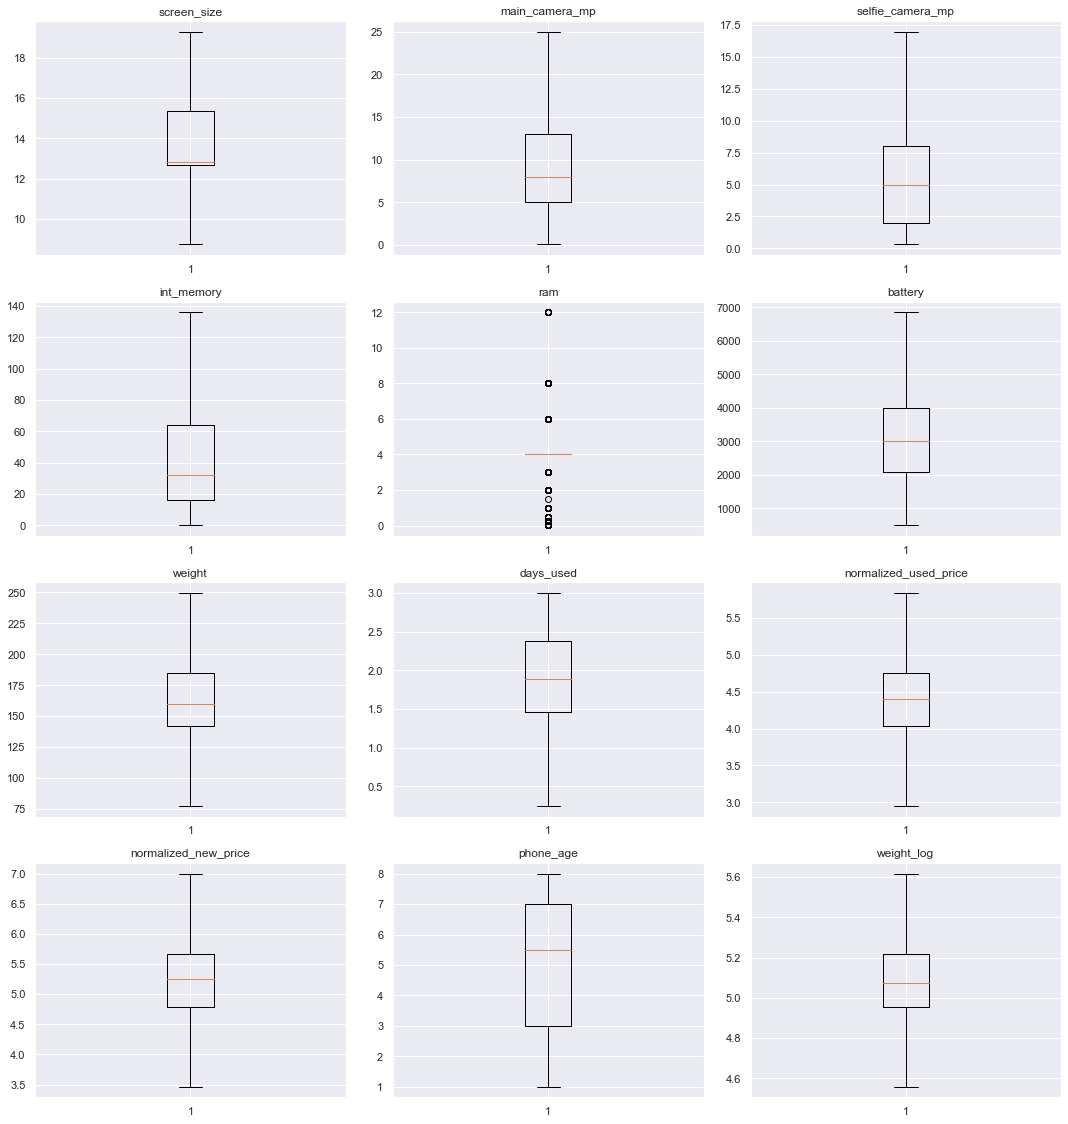

<IPython.core.display.Javascript object>

In [58]:
# Plotting the variables after outlier treatement
plt.figure(figsize=(15, 35))

for i, variable in enumerate(outlier_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##### Observations:
- The application of the IQR method results in the disapperance of the outliers

#### Feature engineering

## Building a Linear Regression model

#### Data Preparation for modeling
- Main goal is to predict the normalized price of used devices.
- Encoding categorical features.
- Splitting the data into train and test to be able to evaluate the model that we build on the train data.

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3454 non-null   float64 
 6   selfie_camera_mp       3454 non-null   float64 
 7   int_memory             3454 non-null   float64 
 8   ram                    3454 non-null   float64 
 9   battery                3454 non-null   float64 
 10  weight                 3454 non-null   float64 
 11  days_used              3454 non-null   float64 
 12  normalized_used_price  3454 non-null   float64 
 13  normalized_new_price   3454 non-null   float64 
 14  phone_age              3454 non-null   i

<IPython.core.display.Javascript object>

In [60]:
# Dropping brand name has 34 unique values. It is not numeric and does not add value for our regression
# We keep os as it contains 4 unique variables and can be useful in our prediction

df2.drop(["brand_name"], axis=1, inplace=True)
df2.shape

(3454, 15)

<IPython.core.display.Javascript object>

#### Defining Dependent Variable

In [61]:
# Define independent variables
X = df2.drop(["normalized_used_price"], axis=1)
# Define target variable
y = df2["normalized_used_price"]

<IPython.core.display.Javascript object>

#### Creating Dummy Variables

In [62]:
# Creating dummy variables for 4g, 5g and os

X = pd.get_dummies(
    X, columns=X.select_dtypes(include=["category"]).columns.tolist(), drop_first=True,
)

X.sample(5)

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,phone_age,weight_log,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
1396,17.78,3.15,0.3,32.0,4.0,4100.0,249.5,2.780822,5.204226,8,5.617149,0,0,0,0,0
62,15.39,8.00,16.0,32.0,3.0,4000.0,178.0,0.865753,4.602166,2,5.181784,0,0,0,1,0
675,14.50,8.00,5.0,32.0,4.0,2800.0,150.0,1.367123,4.605370,2,5.010635,0,0,0,1,0
2654,15.24,12.00,16.0,64.0,4.0,3200.0,167.4,1.419178,5.995656,3,5.120386,0,0,0,1,0
2944,15.21,13.00,5.0,136.0,4.0,3400.0,191.0,1.616438,5.994909,3,5.252273,0,0,0,1,0


<IPython.core.display.Javascript object>

#### Splitting Data to Train and Test

In [63]:
# Splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [64]:
# Showing the rows for train and test after the split
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

#### Adding Intercept to Data- constant

In [65]:
# Adding constant to the train data
x_train1 = sm.add_constant(x_train)

# Adding constant to the test data
x_test1 = sm.add_constant(x_test)

C:\Users\Ahmet\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

#### Linear Regression Model Fitting Summary

In [66]:
# Fitting a linear model
olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     811.8
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           19:56:04   Log-Likelihood:                 222.87
No. Observations:                   2417   AIC:                            -411.7
Df Residuals:                       2400   BIC:                            -313.3
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- Our model can explain 84.4% (R-squared) of the variance in the training set. 84.4% of the variability in the normalized used price is explained by the set of independent variables.
- The model is a good fit as the adjusted R-squared (84.3%) is close to 1.
- A unit change in the normalized used price is due to a change in the screen size (one of the highest correlated variables) 0.0382, the coefficient of a predictor variable. 
- A p-value < 0.05 is considered to be statistically significant. Battery is not considered statistically significant as its p value is greater than 0.05. It is 0.088.
- Confidence interval represents the range in which our coefficients are likely to fall in with a likelihood of 95%. For instance, we are at 95% confident that the screen size coefficient is between  0.031 and 0.045.

## Model performance evaluation

In [67]:
# Function to compute adjusted R-squared


def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model


def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [68]:
# Checking model performance on train set

olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.220656,0.174535,0.84404,0.842934,4.095037


<IPython.core.display.Javascript object>

In [69]:
# Checking model performance on test set

olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel1_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225146,0.177708,0.845245,0.842663,4.17516


<IPython.core.display.Javascript object>

#### Observations

- The training R2 is 0.844, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict the normalized used price within a mean error of 0.17 euros on the test data.

- MAPE of 4.17 on the test data means that we are able to predict within 4.17% of the normalized used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

- No Multicollinearity

- Linearity of variables

- Independence of error terms

- Normality of error terms

- No Heteroscedasticity

#### Multicollinearity Test with The VIF (variance inflation factor ) method

In [70]:
# Importing vif from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [71]:
checking_vif(x_train1)

,feature,VIF
0,const,47902.936447
1,screen_size,5.053231
2,main_camera_mp,2.132309
3,selfie_camera_mp,3.472851
4,int_memory,2.101814
5,ram,2.029125
6,battery,3.524950
7,weight,180.892396
8,days_used,2.591026
9,normalized_new_price,2.871397


<IPython.core.display.Javascript object>

#### Observations:
- Weight, weight log, phone age and screen size have a VIF greater than 5. Therefore, they are good candidates to be dropped. 

#### Removing Multicollinearity

In [72]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [73]:
# list of columns to be dropped
col_list = ["screen_size", "weight", "weight_log", "phone_age"]
# Removing the multicollinearity
res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,phone_age,0.842991,0.221442
1,weight_log,0.842121,0.222055
2,weight,0.839219,0.224087
3,screen_size,0.835572,0.226614


<IPython.core.display.Javascript object>

#### Observations:
- Phone age has the least impact on the predictive power of the model. So we will drop it.

In [74]:
# Dropping the column
col_to_drop = "phone_age"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  phone_age


,feature,VIF
0,const,47887.017243
1,screen_size,4.989009
2,main_camera_mp,2.128012
3,selfie_camera_mp,2.917557
4,int_memory,2.054803
5,ram,2.026916
6,battery,3.445641
7,weight,180.836752
8,days_used,1.878668
9,normalized_new_price,2.556387


<IPython.core.display.Javascript object>

#### Observations:
- Dropping the phone age column leads to two remaining columns with a VIF greater than 5; weight and weight log.

In [75]:
col_list = ["weight", "weight_log"]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight_log,0.842107,0.222065
1,weight,0.839246,0.224068


<IPython.core.display.Javascript object>

#### Observations:
- Weight log has the least impact to the predictive power of the model. We will drop it.

In [76]:
col_to_drop = "weight_log"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


,feature,VIF
0,const,126.975376
1,screen_size,4.978980
2,main_camera_mp,2.057835
3,selfie_camera_mp,2.917346
4,int_memory,2.054721
5,ram,2.026546
6,battery,3.441688
7,weight,4.348465
8,days_used,1.878562
9,normalized_new_price,2.546928


<IPython.core.display.Javascript object>

#### Observations:
- The above predictors have no VIF greater than 5 ; hence no multicollinearity. The assumption is satisfied.**

#### Model Summary after removing multicollinearity

In [77]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     921.4
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           19:56:05   Log-Likelihood:                 215.01
No. Observations:                   2417   AIC:                            -400.0
Df Residuals:                       2402   BIC:                            -313.2
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- The adj. R-squared has dropped from 0.844 to 0.843. This shows that the dropped columns could not add value to the model.
- Next step is to look for high pvalues to determine their significance.

#### Dealing with  High P value

In [78]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'normalized_new_price', '4g_yes']


<IPython.core.display.Javascript object>

In [79]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

#### Model Summary after removing High p value

In [80]:
# Running the model to check whether p values have been treated
olsmod3 = sm.OLS(y_train, x_train4).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     1611.
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           19:56:05   Log-Likelihood:                 211.37
No. Observations:                   2417   AIC:                            -404.7
Df Residuals:                       2408   BIC:                            -352.6
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- No variable has a p value greater than 0.05. 
- x_train3's features arise as the final set of predictor variables.
- Olsmod3 is our final model.

#### Testing for Linearity

In [81]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.810392,0.277096
1525,4.448399,4.685429,-0.237029
1128,4.315353,4.314183,0.001169
3003,4.282068,4.260367,0.021701
2907,4.456438,4.507363,-0.050925


<IPython.core.display.Javascript object>

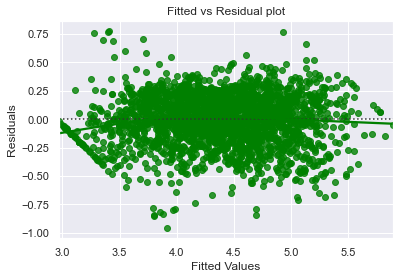

<IPython.core.display.Javascript object>

In [82]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="green", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations:
- We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

#### Testing for Normality

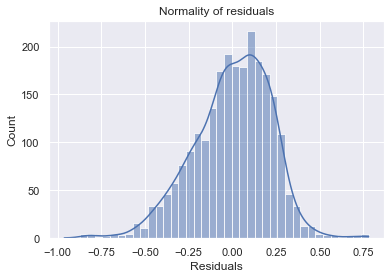

<IPython.core.display.Javascript object>

In [83]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

#### Observations:
- The histogram of residuals does have a bell shape. However, a very slight left skewness can be spotted.
- Let's check the Q-Q plot.

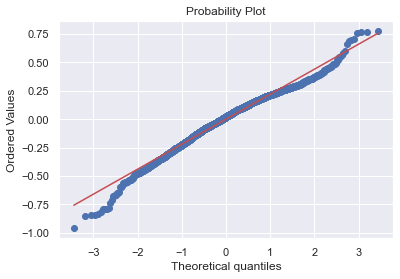

<IPython.core.display.Javascript object>

In [84]:
# Plotting the residuals with Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations;
- Residuals go along a straight line except for the tails.
- Checking the Shapiro test.

In [85]:
# Calculating the Shapiro test still to test normality
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9831963777542114, pvalue=2.6559477743833156e-16)

<IPython.core.display.Javascript object>

#### Observations:
- Per the Shapiro-wilk test, the residuals are not normal since the p value is less than 0.05.
- As an approximation , we consider the distribution close to being normal
- Assumption is satisfied.

#### Testing for Homoscedasticity

In [86]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 1.1113893578712861), ('p-value', 0.03376959522203164)]

<IPython.core.display.Javascript object>

#### Observations
- The assumption is not met as p-value is less than 0.05. Therefore , we have heteroscedasticity. The standard errors of the coefficients are wrong. OLS loses its efficiency and is not the best line unbiased estimator(BLUE)

In [87]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(
    olsmod3, x_train4, y_train
)  ## Complete the code to check performance on train data
olsmodel3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221709,0.175263,0.842548,0.841959,4.110386


<IPython.core.display.Javascript object>

In [88]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel3_test_perf = model_performance_regression(
    olsmod3, x_test4, y_test
)  ## Complete the code to check performance on test data
olsmodel3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227593,0.180161,0.841863,0.840477,4.233786


<IPython.core.display.Javascript object>

#### Normalized Used Price Prediction

In [89]:
# predictions on the test set
pred = olsmod3.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.411570
2341,3.696103,3.947475
1913,3.592093,3.730753
688,4.306495,4.145396
650,4.522115,5.089268
2291,4.259294,4.396354
40,4.997685,5.303666
1884,3.875359,4.070962
2538,4.206631,3.970472
45,5.380450,5.396488


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

- Our model shows that:
- 84.3% of the variability in the normalized used price is explained by the set of independent variables.
- MAE suggests that the model can predict the normalized used price within a mean error of 0.18 euros on the test data.

- MAPE of 4.11 on the test data means that we are able to predict within 4.11% of the normalized used price.
- The predicted values are close to the actual values. 
- The predictions remain unbiased and consistent, but the lack of the best BLUE (Best Linear Unbiased Estimators)due to the homoscedasticity assumption failure renders the prediction model inefficient and unreliable.
- Model fine-tuning or model replacement arises as a solution.
